In [ ]:
# Cargamos librerias
import pandas as pd
import numpy as np

# Generamos set de datos
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Creamos un array de 3 clusters en 3-dimensiones
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

# Estandardizamos la data
X = StandardScaler().fit_transform(X)

# Preparamos el array en un DataFrame
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]
df = pd.DataFrame(X, columns=col_name)
df['cluster_label'] = y

df.head()

,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2
...,...,...,...,...
95,0.094766,-1.110825,-0.403650,1
96,0.845579,0.260281,-0.809395,0
97,-1.922414,0.930548,2.032282,2
98,0.603141,0.278822,-0.752713,0


In [ ]:
# Visualizamos nuestra data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df, x='x0', y='x1', z='x2', color=df['cluster_label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

Los datos parecen estar listos para PCA. Vamos a intentar reducir su dimensionalidad. Afortunadamente, Sklearn hizo que PCA fuera muy fácil de ejecutar. 

In [ ]:
# Ejecutar PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

Cuando ajustamos nuestros datos con la función PCA de Sklearn, esta hace todo el trabajo pesado para devolvernos un modelo PCA y los datos transformados.

El modelo nos da acceso a multitud de atributos como valores propios, vectores propios, media de los datos originales, varianza explicada y la lista continúa. Estos son increíblemente perspicaces si queremos entender qué ha hecho el PCA con nuestros datos.

Un atributo a resaltar es el pca.explained_variance_ratio_ que nos dice la proporción de varianza explicada por cada componente principal. Podemos visualizar esto con un Scree Plot.

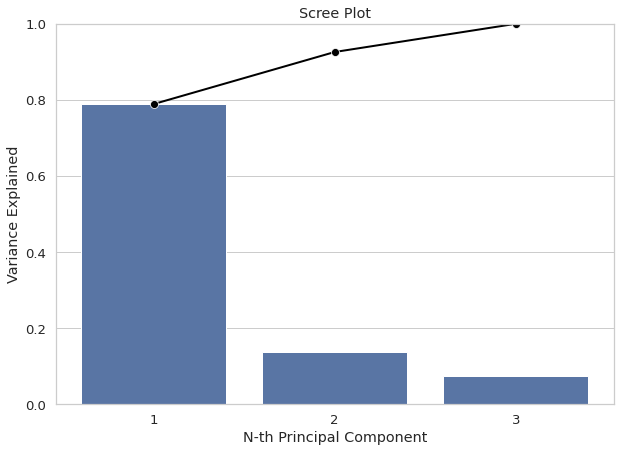

In [ ]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

El gráfico nos informa que usar 2 componentes principales en lugar de 3 está bien porque pueden capturar más del 90 % de la varianza.

Además de eso, también podemos ver las combinaciones de variables que crearon cada componente principal con pca.components_**2. Podríamos usar un mapa de calor para mostrar esto.

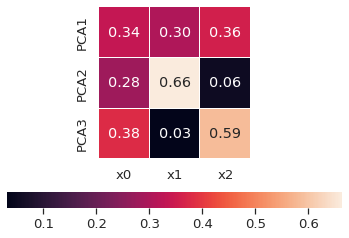

In [ ]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

Podemos ver que PCA1 está hecho de 34% de x0, 30% de x1 y 36% de x2. PCA2 está dominado principalmente por x1.

Podemos volver a ejecutar el modelo PCA, pero esta vez con el argumento n_components=2, que le dice a PCA que conserve solo los 2 componentes principales principales para nosotros.

In [ ]:
# Ejecutar PCA (Escogemos mantener n_components)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

# Convertimos de nuevo a DataFrame para poder leer
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

,PC1,PC2,label
0,1.750435,-0.041716,2
1,2.255957,-0.226133,2
2,-1.058243,0.998596,1
3,-1.165212,-0.799110,0
4,1.478118,-0.034766,2


Esto nos devolverá un DataFrame con los dos primeros componentes principales. Finalmente, podemos trazar un diagrama de dispersión para visualizar nuestros datos.

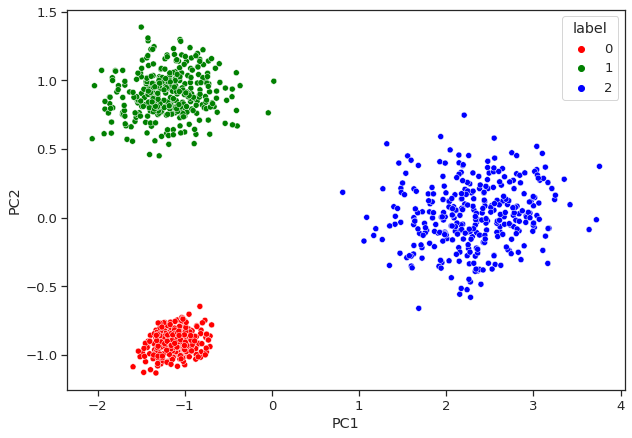

In [ ]:
# Ploteamos Componentes Principales
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'], palette=['red', 'green', 'blue'])


**Introduciendo Principal Component Analysis**

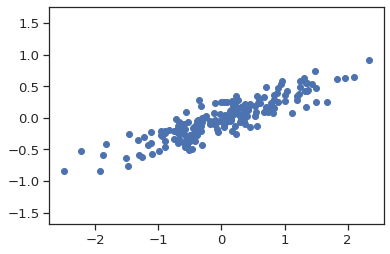

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, está claro que existe una relación casi lineal entre las variables x e y. Esto recuerda a los datos de regresión lineal que exploramos en regresión lineal, pero la configuración del problema aquí es ligeramente diferente: en lugar de intentar predecir los valores de y a partir de los valores de x, el problema de aprendizaje no supervisado intenta aprender sobre la relación entre los valores de x e y.

En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de los ejes principales en los datos y usando esos ejes para describir el conjunto de datos. Usando el estimador PCA de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

El ajuste aprende algunas cantidades de los datos, sobre todo los "componentes" y la "varianza explicada"

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector

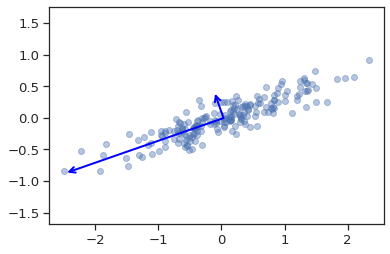

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='blue')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje. La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

Si trazamos estos componentes principales junto a los datos originales, vemos los gráficos que se muestran con el siguiente codigo:

**Principal Components Rotation**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[(-3.0, 3.1),
 Text(0, 0.5, 'componente 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'componente 1'),
 Text(0.5, 1.0, 'componentes principales ')]

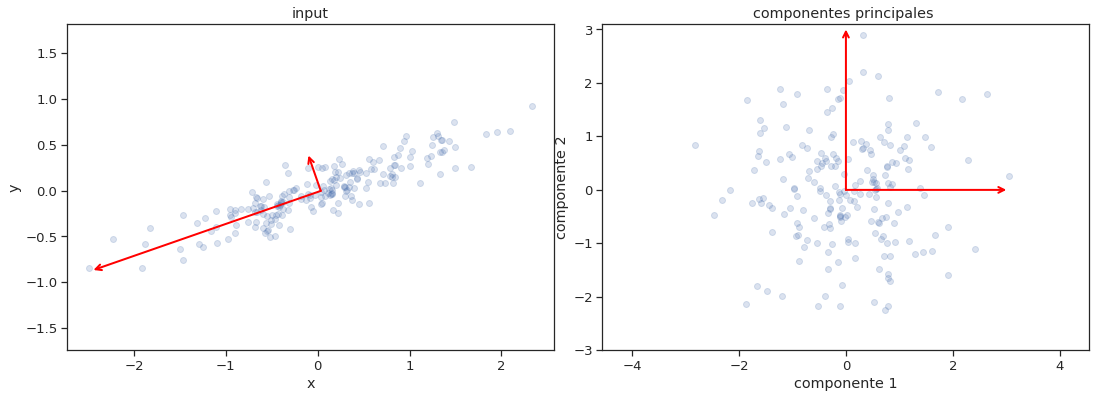

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# ploteamos data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# ploteamos componentes principales 
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='componente 1', ylabel='componente 2',
          title='componentes principales ',
          xlim=(-5, 5), ylim=(-3, 3.1))

#fig.savefig('figures/05.09-PCA-rotation.png')

Esta transformación de ejes de datos a ejes principales es una transformación afín, lo que básicamente significa que se compone de traslación, rotación y escalado uniforme.

Si bien este algoritmo para encontrar los componentes principales puede parecer solo una curiosidad matemática, resulta que tiene aplicaciones de gran alcance en el mundo del aprendizaje automático y la exploración de datos.

**PCA como reducción de dimensionalidad**

El uso de PCA para la reducción de dimensionalidad implica poner a cero uno o más de los componentes principales más pequeños, lo que da como resultado una proyección de menor dimensión de los datos que conserva la variación máxima de los datos.

Aquí hay un ejemplo del uso de PCA como una transformación de reducción de dimensionalidad:

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("tamaño original:   ", X.shape)
print("tamaño transformado:", X_pca.shape)

tamaño original:    (200, 2)
tamaño transformado: (200, 1)


Los datos transformados se han reducido a una sola dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformada inversa de estos datos reducidos y representarlos junto con los datos originales:

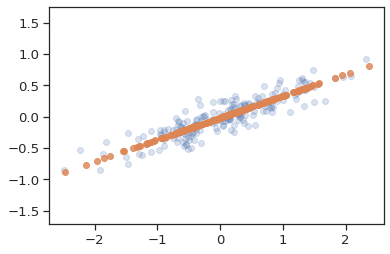

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada. Esto deja en claro lo que significa una reducción de dimensionalidad de PCA: la información a lo largo del eje o ejes principales menos importantes se elimina, dejando solo los componentes de los datos con la varianza más alta. La fracción de varianza que se elimina (proporcional a la dispersión de puntos sobre la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50 %, la relación general entre los puntos de datos se conserva en su mayor parte.

**PCA para visualización: dígitos escritos a mano**

La utilidad de la reducción de la dimensionalidad no puede ser del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión. Para ver esto, echemos un vistazo rápido a la aplicación de PCA a los datos de dígitos que vimos en In-Depth: Decision Trees and Random Forests.

Empezamos cargando los datos

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recuerde que los datos consisten en imágenes de 8 × 8 píxeles, lo que significa que tienen 64 dimensiones. Para ganar algo de intuición en las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos

In [ ]:
pca = PCA(2)  # projectamos desde 64 a 2 dimensiones
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


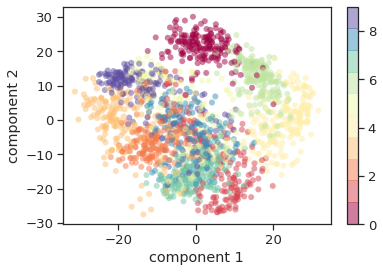

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recuerde lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor variación. Esencialmente, hemos encontrado el estiramiento y la rotación óptimos en un espacio de 64 dimensiones que nos permite ver el diseño de los dígitos en dos dimensiones, y lo hemos hecho sin supervisión, es decir, sin referencia a las etiquetas.

**Escogiendo el numero de componentes:**

Una parte vital del uso de PCA en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos. Esto se puede determinar observando la relación de varianza acumulada explicada como una función del número de componentes:

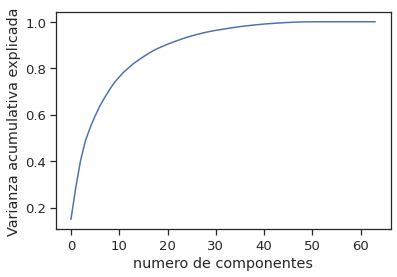

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Varianza acumulativa explicada');

Esta curva cuantifica cuánto de la varianza total de 64 dimensiones está contenida en los primeros N componentes. Por ejemplo, vemos que con los dígitos los primeros 10 componentes contienen aproximadamente el 75 % de la varianza, mientras que necesita alrededor de 50 componentes para describir cerca del 100 % de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos alrededor de 20 componentes para retener el 90 % de la varianza. Mirar este gráfico para un conjunto de datos de alta dimensión puede ayudarlo a comprender el nivel de redundancia presente en múltiples observaciones.

**PCA as Noise Filtering**

PCA también se puede utilizar como un enfoque de filtrado para datos ruidosos. La idea es esta: cualquier componente con una variación mucho mayor que el efecto del ruido no debería verse afectado por el ruido. Entonces, si reconstruye los datos utilizando solo el subconjunto más grande de componentes principales, debería mantener preferentemente la señal y descartar el ruido.

Veamos cómo se ve esto con los datos de los dígitos. Primero trazaremos varios de los datos de entrada libres de ruido:

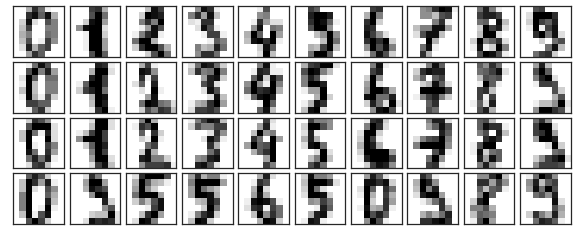

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Agregamos ruido

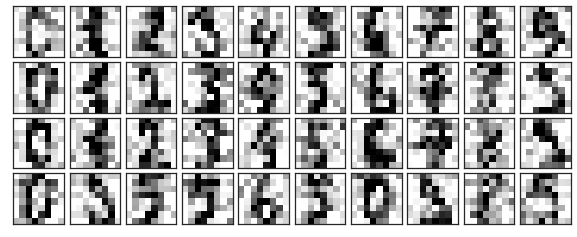

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Está claro a simple vista que las imágenes tienen ruido y contienen píxeles falsos. Entrenemos un PCA en los datos ruidosos, solicitando que la proyección conserve el 50% de la varianza:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Aquí el 50% de la varianza asciende a 12 componentes principales. Ahora calculamos estos componentes y luego usamos el inverso de la transformación para reconstruir los dígitos filtrados

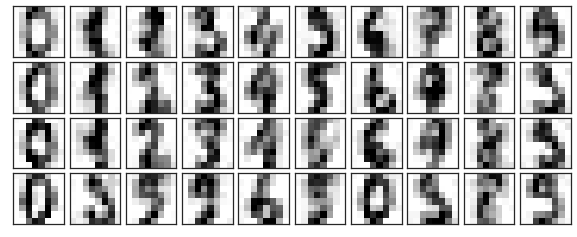

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de filtrado de ruido/preservación de señal hace que PCA sea una rutina de selección de características muy útil; por ejemplo, en lugar de entrenar a un clasificador en datos de dimensiones muy altas, puede entrenar al clasificador en la representación de dimensiones más bajas, que servirá automáticamente para filtrar eliminar el ruido aleatorio en las entradas.

**Ejemplo: Eigenfaces**

Anteriormente, exploramos un ejemplo del uso de una proyección PCA como selector de características para el reconocimiento facial con una máquina de vectores de soporte. Aquí vamos a echar un vistazo atrás y explorar un poco más de lo que pasó en eso. Recuerde que estábamos usando el conjunto de datos Labeled Faces in the Wild disponible a través de Scikit-Learn

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Echemos un vistazo a los ejes principales que abarcan este conjunto de datos. Debido a que este es un conjunto de datos grande, usaremos RandomizedPCA: contiene un método aleatorio para aproximar los primeros N componentes principales mucho más rápido que el estimador PCA estándar y, por lo tanto, es muy útil para datos de alta dimensión (aquí, una dimensionalidad de casi 3.000). Echaremos un vistazo a los primeros 150 componentes:

In [ ]:
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA
#pca = RandomizedPCA(150)
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized', whiten=True)

En este caso, puede ser interesante visualizar las imágenes asociadas con los primeros componentes principales (estos componentes se conocen técnicamente como "vectores propios", por lo que este tipo de imágenes a menudo se denominan "caras propias"). Como puede ver en esta figura, son tan espeluznantes como suenan:

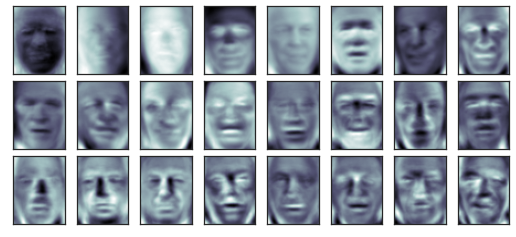

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Los resultados son muy interesantes y nos dan una idea de cómo varían las imágenes: por ejemplo, las primeras caras propias (desde la parte superior izquierda) parecen estar asociadas con el ángulo de iluminación en la cara, y los vectores principales posteriores parecen estar eligiendo ciertos rasgos, como ojos, narices y labios. Echemos un vistazo a la varianza acumulada de estos componentes para ver qué parte de la información de datos conserva la proyección

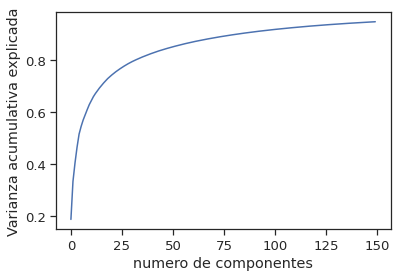

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Varianza acumulativa explicada');

Vemos que estos 150 componentes explican poco más del 90% de la varianza. Eso nos llevaría a creer que utilizando estos 150 componentes recuperaríamos la mayor parte de las características esenciales de los datos. Para hacer esto más concreto, podemos comparar las imágenes de entrada con las imágenes reconstruidas a partir de estos 150 componentes:

In [ ]:
# Computamo los componentes y rosotros proyectados
pca = RandomizedPCA(170).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

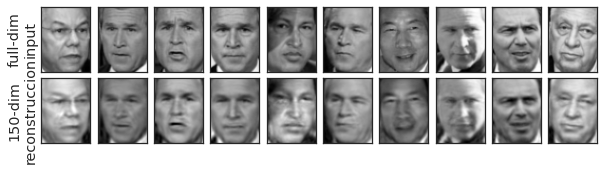

In [ ]:
# Ploteamos los resultados
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruccion');

La fila superior aquí muestra las imágenes de entrada, mientras que la fila inferior muestra la reconstrucción de las imágenes de solo 150 de las ~3000 características iniciales. Esta visualización aclara por qué la selección de características de PCA utilizada en In-Depth: Support Vector Machines tuvo tanto éxito: aunque reduce la dimensionalidad de los datos en casi un factor de 20, las imágenes proyectadas contienen suficiente información que, a simple vista, reconocer a los individuos en la imagen. Lo que esto significa es que nuestro algoritmo de clasificación debe entrenarse con datos de 150 dimensiones en lugar de datos de 3000 dimensiones, lo que, según el algoritmo particular que elijamos, puede conducir a una clasificación mucho más eficiente.